# 05. 비례위험 가정의 평가
### 비례위험가정 : 시간에 따라 어떤 변수에서의 Hazard ratio가 일정해야한다는 것

In [14]:
library(survival)
library(autoReg)
library(tidyverse)

# 
### 5-1 그래프 활용법
#### 로그-로그생존곡선
- **두 그룹 간의 생존을 비교할 때,** 콕스비례위험 가정하에 두 그룹의 생존은 다음과 같은 관계
- $S_0$ : 첫 번째 그룹의 생존 / $S_1$ : 두 번째 그룹의 생존
#### $S_1(t) = s_0(t)^{exp(\beta)}$ 
#### $(exp(\beta))는\;\;비례위험상수)$
#### $log[S_1(t)] = exp(\beta)\;\times\;log[S_0(t)]$
#### 생존함수는 1보다 작으므로, 생존함수의 로그는 음수 -> 양변에 -1을 곱한 후, 다시 로그
#### $log(-log[S_1(t)]) = \beta + log(-log[S_0(t)])$

# 
- **비례위험 가정이 맞다면, 두 그룹의 생존곡선에 로그-로그를 취했을 때 서로 평행하여야 함**
    - 대조군 (rx = 1)과 치료군 (rx = 0)의 로그-로그생존곡선이 서로 평행 -> **비례위험 가정이 맞음**

#### ```loglogplot()``` : 로그-로그 곡선
- 설명변수가 연속형 변수일경우 자동으로 3개의 그룹으로 나눔
- 그룹의 개수를 지정하고 싶다면 ```no```로 지정

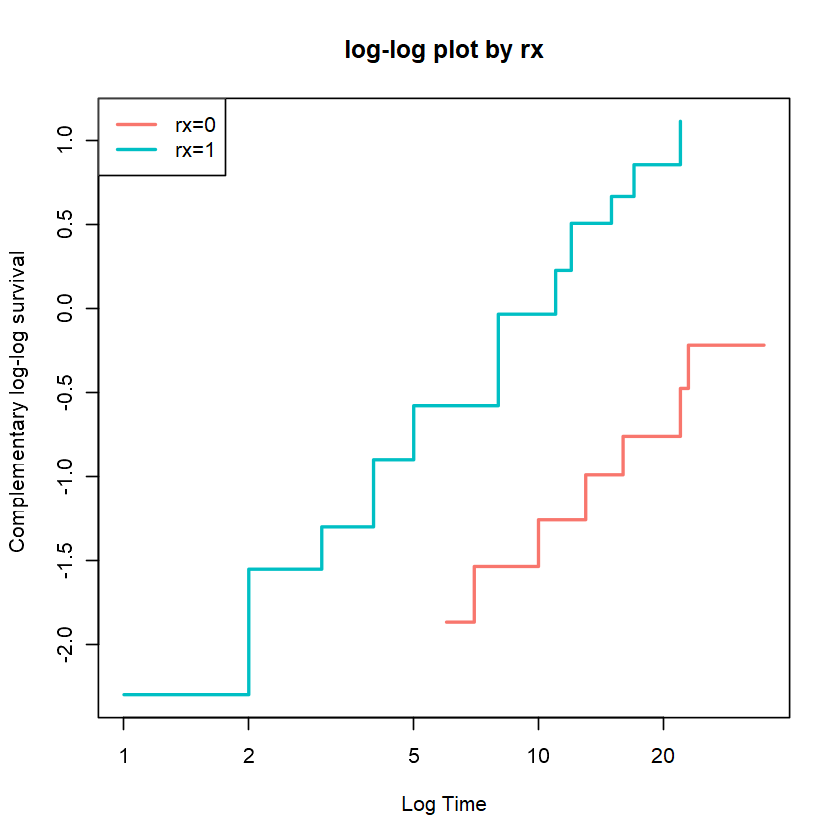

In [1]:
fit = survfit(Surv(time, status) ~ rx, data = anderson)
loglogplot(fit)

# 
- 성별(sex)를 설명변수로 하는 모형이 콕스비례위험 가정을 만족하는지에 대한 검정
    - 로그-로그생존곡선 이 서로 교차 -> 비례위험 가정이 맞지 않음

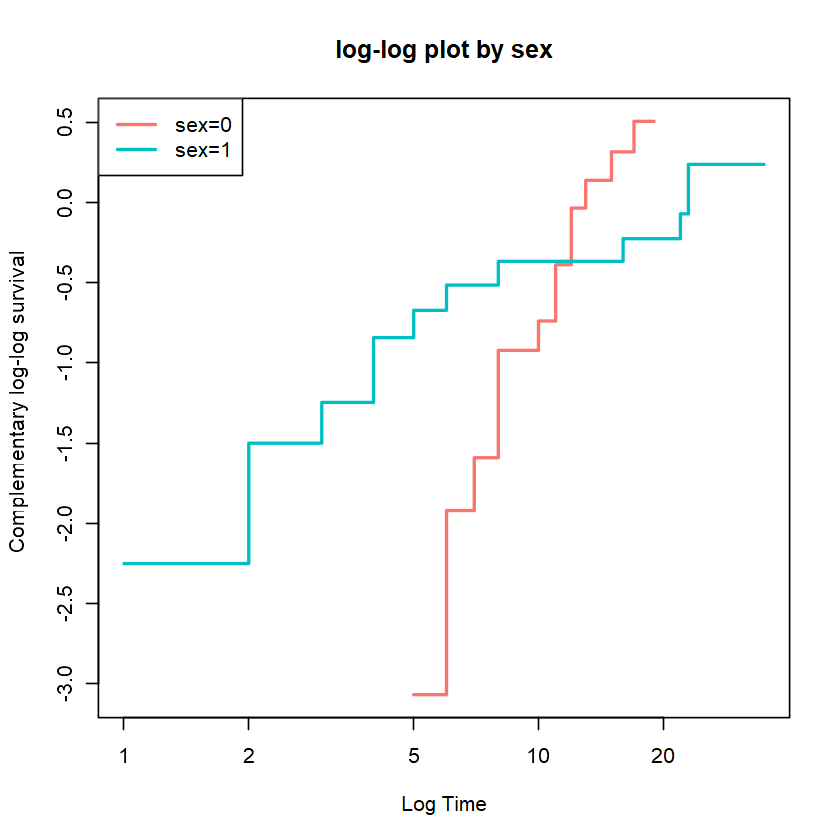

In [2]:
fit1 = survfit(Surv(time, status) ~ sex, data = anderson)
loglogplot(fit1)

# 
- logWBC를 설명변수로 하는 모형이 콕스비례위험 가정을 만족하는지에 대한 검정

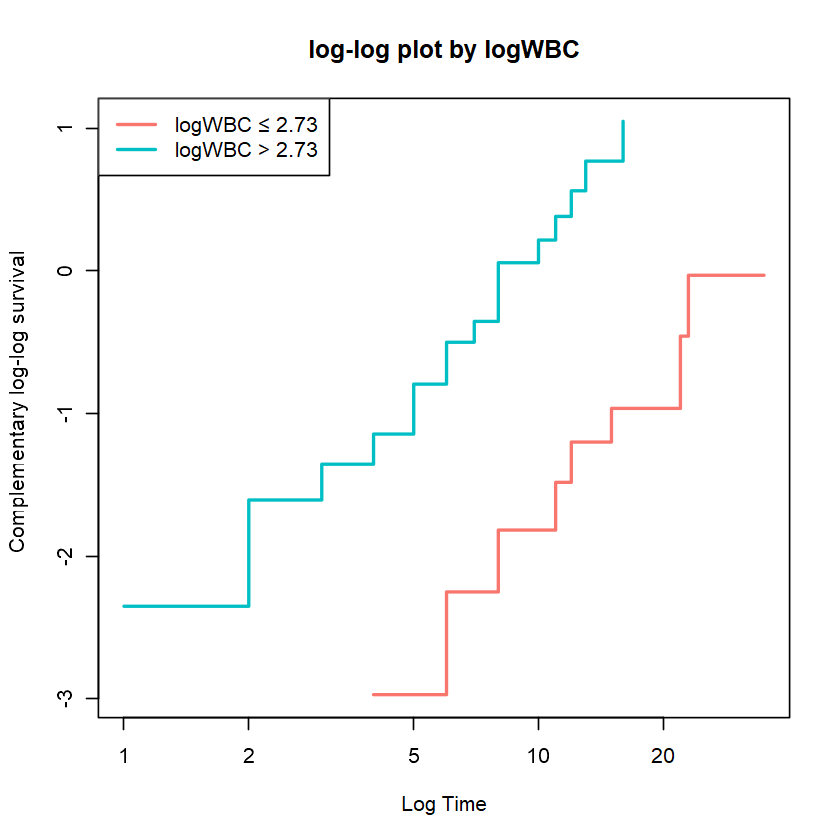

In [3]:
fit3 = survfit(Surv(time, status) ~ logWBC, data = anderson)
loglogplot(fit3, no = 2)

# 
- 복수의 설명변수를 한번에 평가 (첫 번째 설명변수의 개수와 두 번째 설명변수의 개수의 곱 만큼 곡선 생성)

In [4]:
fit4 = survfit(Surv(time, status)0 ~ rx + logWBC, anderson)
loglogplot(fit4)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:34: unexpected numeric constant
1: fit4 = survfit(Surv(time, status)0
                                     ^


### 로그-로그생존곡선을 이용하여 비례위험 가정을 평가하는 방법은 직관적이나, 통계적 유의성을 평가할 수 없음
**데이터가 적은상태에서, 여러 변수에 대하여 한번에 로그-로그생존곡선을 그리는 경우 => 그룹별로 데이터가 분리되어 데이터의 개수가 더 작아짐**

# 
#### 관측-기대값 그림 (observed versus expected plot)
- 적합도 검정을 그래프로 표현한 것
- 로그-로그생존곡선의 대안
- **기대값(점선)의 곡선과 관측값(실선)의 거리가 가까우면, 비례위험 가정에 적합**

# 

#### ```OEplot()```

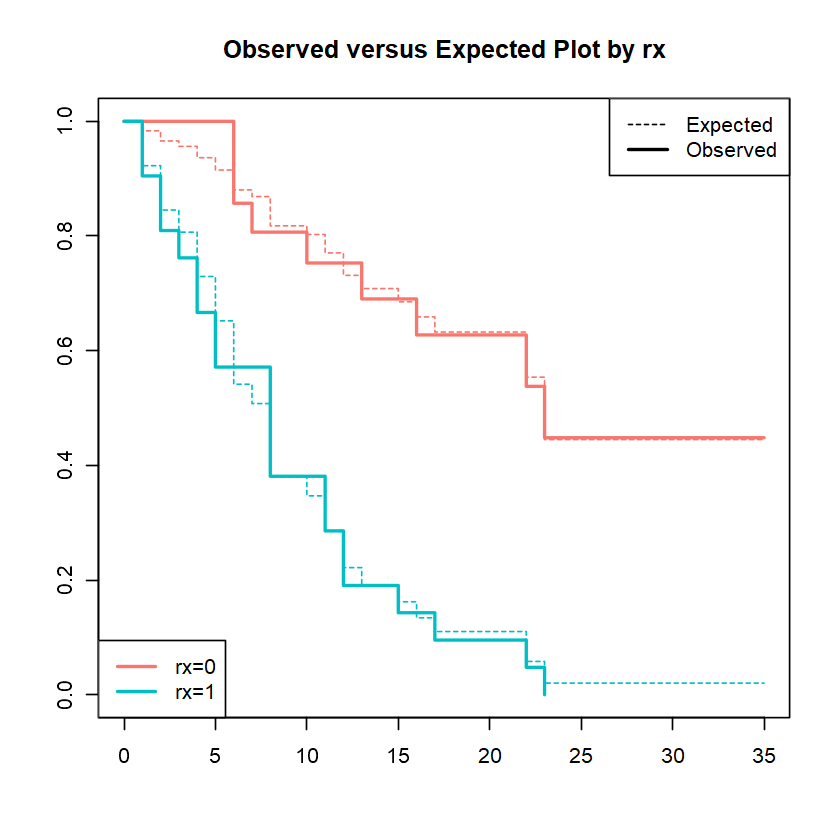

In [5]:
fit5 = coxph(Surv(time, status) ~ rx, data = anderson)
OEplot(fit5)

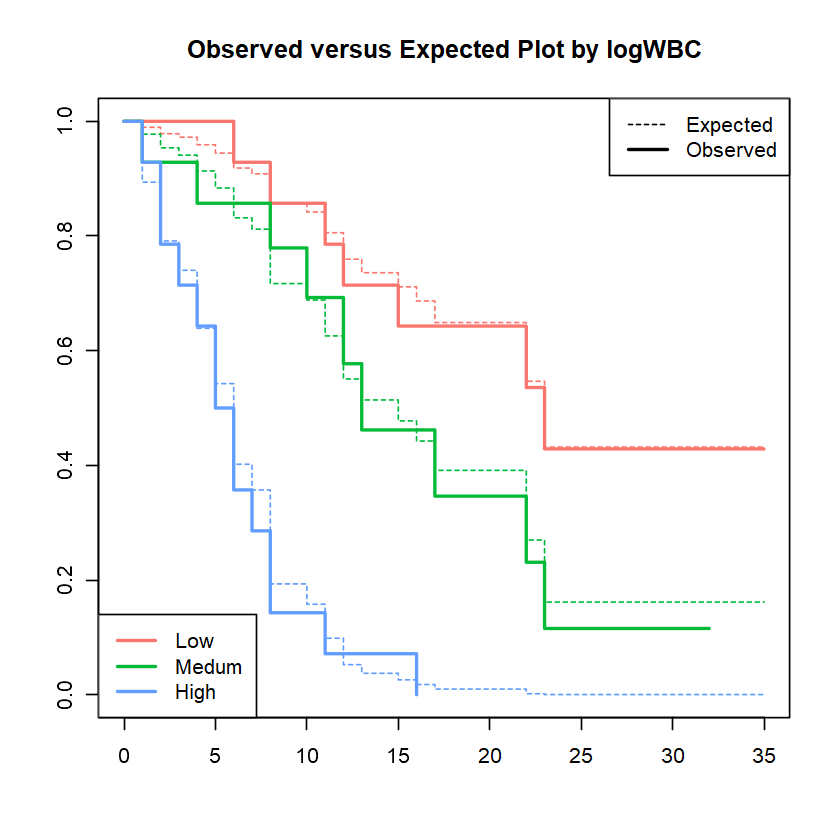

In [6]:
fit6 = coxph(Surv(time, status) ~ logWBC, anderson)
OEplot(fit6)

# 
- **남녀의 관측값 곡선은 12주 근처에서 교차하지만, 기대값 곡선은 교차하지 않으며, 여성의 기대값 곡선은 추적기간 내내 남성의 곡선보다 아래에 위치**
- **남성과 여성모두 두 관찰값과 기대값이 상당히 다르다**

#### 따라서 성별에 관한 설명변수는 비례위험 가정을 만족하지 못함

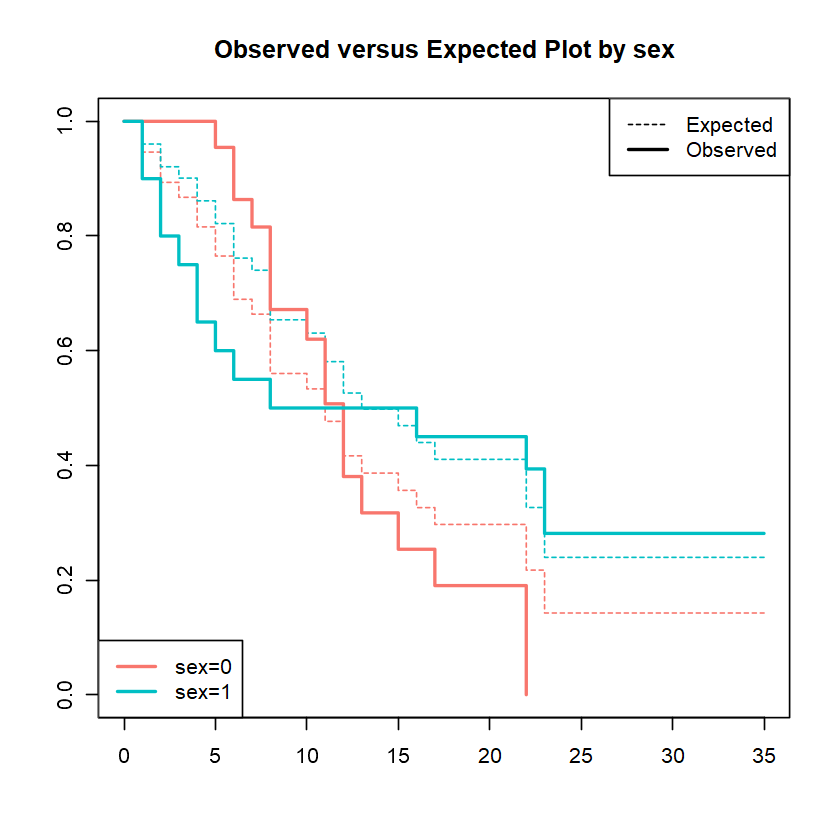

In [7]:
fit7 = coxph(Surv(time, status) ~ sex, anderson)
OEplot(fit7)

# 
# 
### 5-2 잔차를 이용한 적합도 평가
#### 마팅게일잔차 & 편차잔차
#### 마팅게일잔차 (Martingale residual) : 이벤트의 발생여부(0 또는 1)에서 누적위험함수값을 뺀 값
- **공변량의 적절한 함수형태를 찾는데 사용**

- (누적위험함수 값 : 콕스비례위험모형에 적합한 후 구한 값)
#### **$m_i = \delta_i - \hat{H_0}(t_i) \;\times\;e^{z'_i \beta}$**

# 
- 마팅게일잔차의 값은 비대칭 값 **($-\infty < m_i \leq 1$)**이며, **합은 0**
- **선형회귀에서는 잔차제곱합이 모형에 대한 적합도로 활용되지만, 생존분석에서 마팅게일잔차는 모형의 적합도를 평가하는데 사용되지 않음 (대신 편차(deviance)를 사용)**

# 
#### 마팅게일잔차 활용
1. **영모형 생성**

2. **마팅게일잔차와 공변량을 plot**

# 

#### age와 마팅게일잔차는 선형관계 -> age는 로그변환 없이 사용 결정

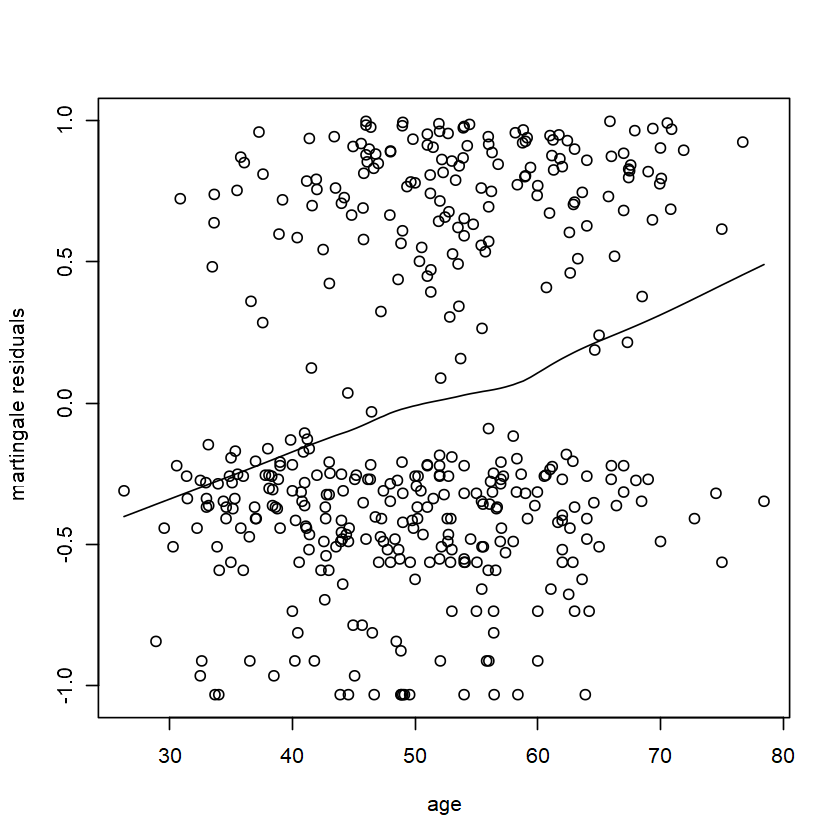

In [8]:
fit0 = coxph(Surv(time, status == 2) ~ 1, data = pbc)
r1 = residuals(fit0, type = "martingale")
plot(pbc$age, r1, xlab = "age", ylab = "martingale residuals")
lines(lowess(pbc$age, r1))

# 
#### bilirubin은 로그변환을 하였을 때, 선형관계를 보임 -> bilirubin은 로그변환 결정

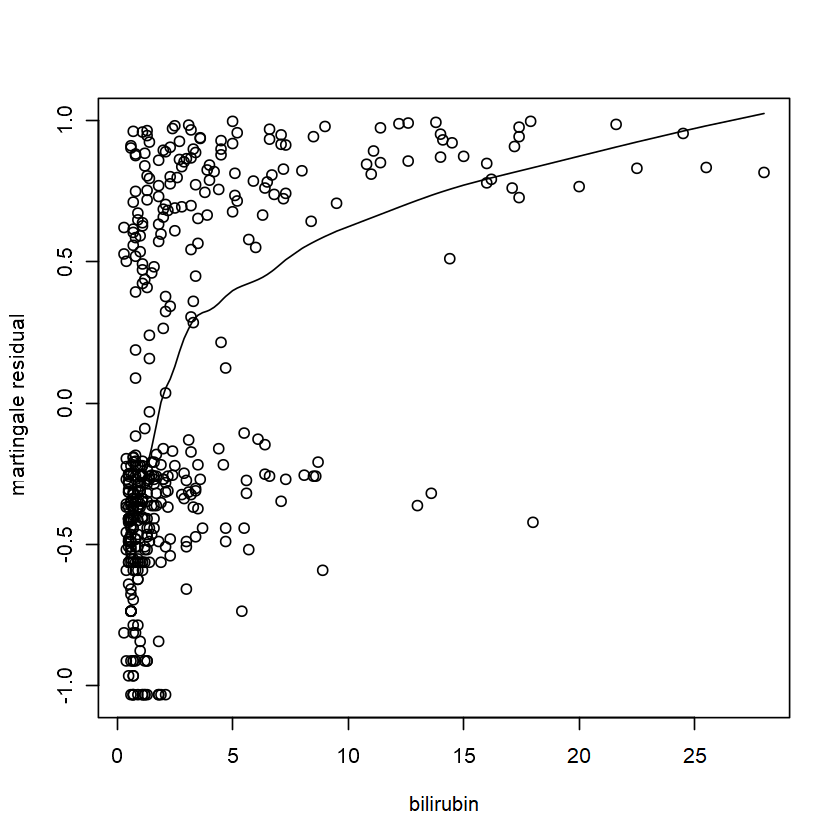

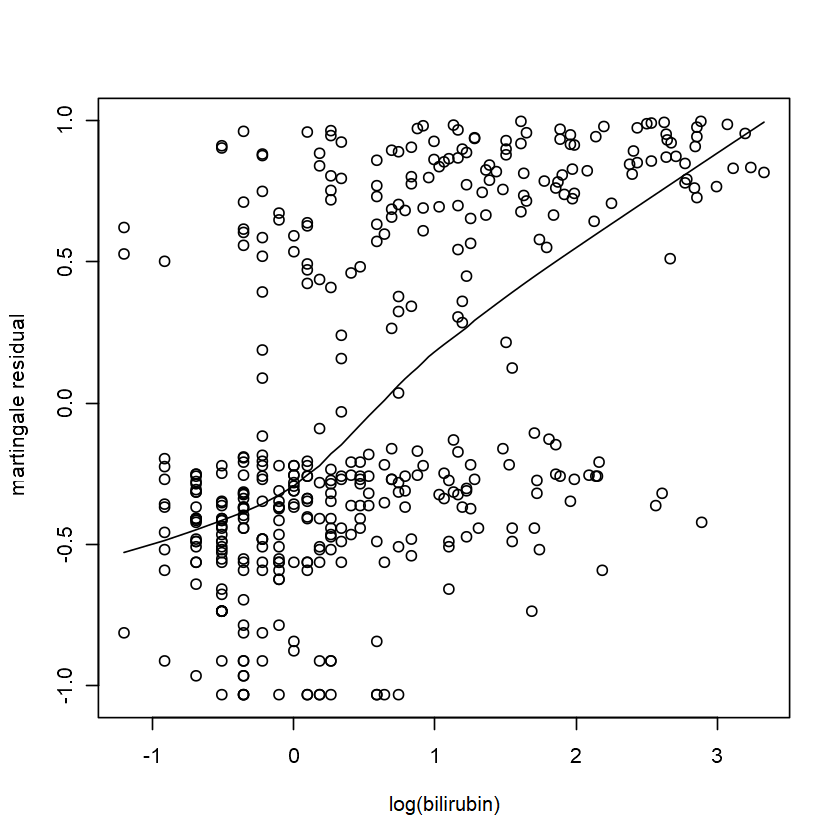

In [9]:
plot(pbc$bili, r1, xlab = "bilirubin", ylab = "martingale residual")
lines(lowess(pbc$bili, r1))
plot(log(pbc$bili), r1, xlab = "log(bilirubin)", ylab = "martingale residual")
lines(lowess(log(pbc$bili), r1))

# 
#### ```residualNULL()``` : 영모형적합 후, 모든 변수에 대하여 로그변환을 진행한 잔차산점도

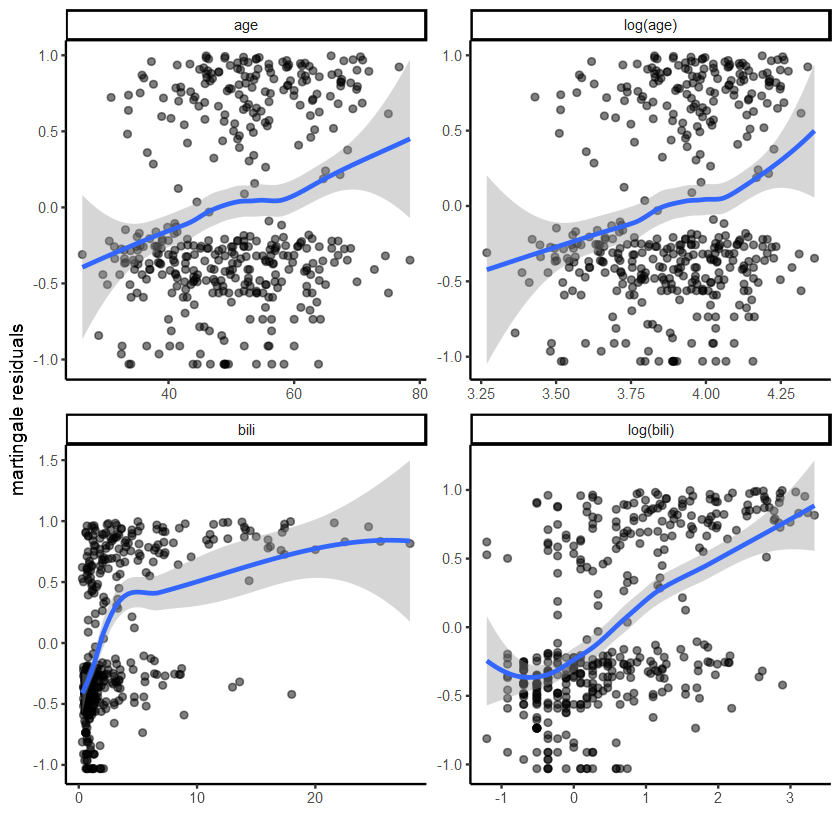

In [10]:
fit = coxph(Surv(time, status == 2) ~ age + bili, pbc)
residualNull(fit)

# 

#### 금연치료 데이터 예제
- ```priorAttempts``` : 과거 금연시도 횟수
- ```longestNoSmoke``` : 가장 긴 금연기간

# 
- ```longestNoSmoke```는 로그변환이 적절한 것으로 판단
- **나머지 2개변수는 로그변환 이전과 이후의 큰 차이 없음**

In [30]:
with(pharmacoSmoking, Surv(ttr, relapse))

  [1] 182+  14    5   16    0  182+  14   77    2    0   12  182+  21    3  170 
 [16]  25    4  182+ 140   63   15  140  110  182+   0  182+  15  182+   4   56 
 [31]   2   80  182+  56    0   14   14   28  182+   6  182+  14   15  182+  75 
 [46]  30    4   56  182+ 182+   5    8  140   20   63   30    8   50   14    0 
 [61]  84    0  105  182+ 182+ 182+   7  182+   0    8    1  182+  12  182+  49 
 [76] 182+ 182+   2  182+  56  182+   0   28  155    2    0    0    1  140    1 
 [91]  28    1  182+  77   56  182+ 182+ 182+ 182+ 182+  21   60    0  182+  65 
[106] 182+ 182+ 182+ 182+   2   40  100    1   45   14   30   42    2  182+  60 
[121]  10    0  170   15  182+

Warning message:
"Removed 23 rows containing non-finite values (`stat_smooth()`)."


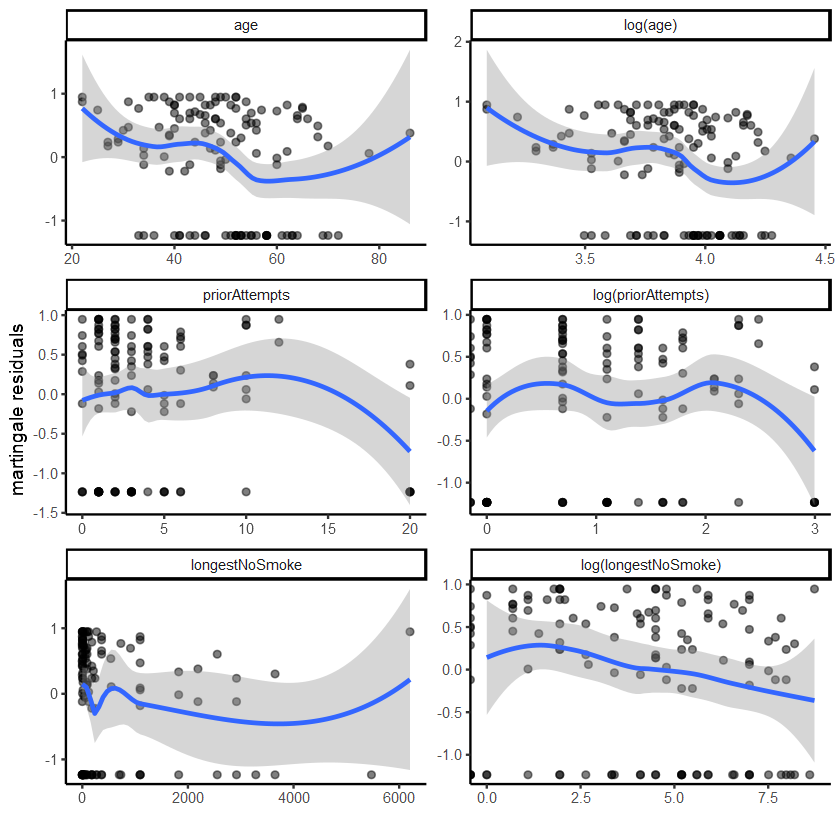

In [17]:
data(pharmacoSmoking, package = "asaur")
pharmacoSmoking %>% mutate(priorAttempts = ifelse(priorAttempts >= 20, 20, priorAttempts)) -> pharmacoSmoking
fit = coxph(Surv(ttr, relapse) ~ age + priorAttempts + longestNoSmoke, pharmacoSmoking)
residualNull(fit)

# 
- **범주형 변수들의 잔차는 각 군별로 고르게 분포**
- **연속형 변수들은 일부 편중된 모습을 보이지만 영모형보다는 개선**

#### ```residualPlot()``` : 잔차 산점도

In [35]:
fit1 = coxph(Surv(ttr, relapse) ~ grp + gender + race + employment + yearsSmoking + 
             levelSmoking + age + priorAttempts + log(I(longestNoSmoke + 1)), pharmacoSmoking)
final <- step(fit1, trace = 0)

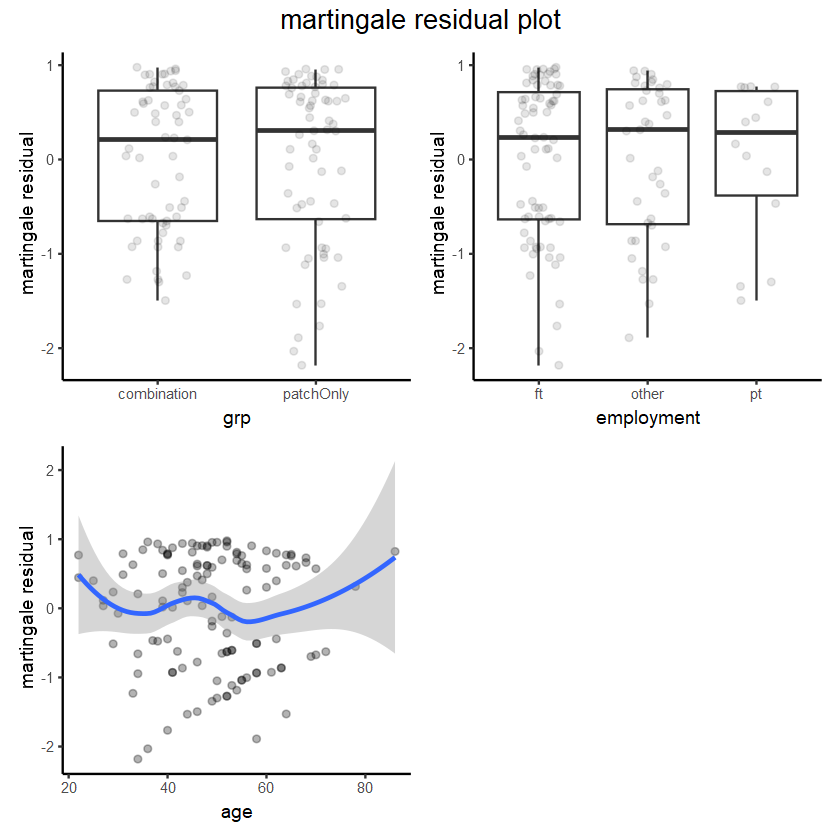

In [36]:
residualPlot(final)

# 
# 
#### 사례삭제편차 (case delection residuls, 재크나이프 편차)
- **데이터의 일부 사례(이상치)들이 모형의 추정치에 큰 영향을 미치는 경우 -> 영향관측치들이 모형에 문제발생** 

# 
**각 관측치를 제거하였을 때의 회귀계수와, 전체 데이터를 사용한 회귀계수의 차이**
- 차이의 절대값이 큰 5개의 값을 보여줌
- 차이의 절대값이 회귀계수의 10%가 넘는 경우, 빨간색으로 표시

#### ```residualPlot( , ... type = "dfbeta")``` : 사례삭제편차

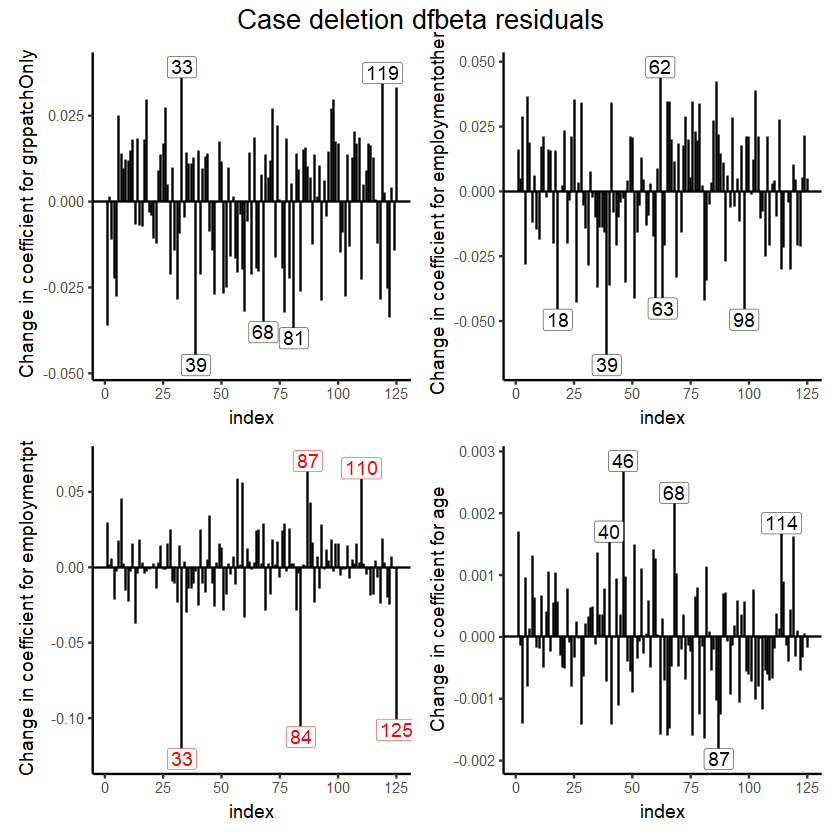

In [37]:
residualPlot(final, type = "dfbeta")
# residualPlot(final, type = "dfbeta", vars = "employmentpt", topn = 10)

# 
# 
#### ```residualPlot( , ... type = "dfbetas")``` : dfbeta 잔차를 표준오차로 나누어 표준화

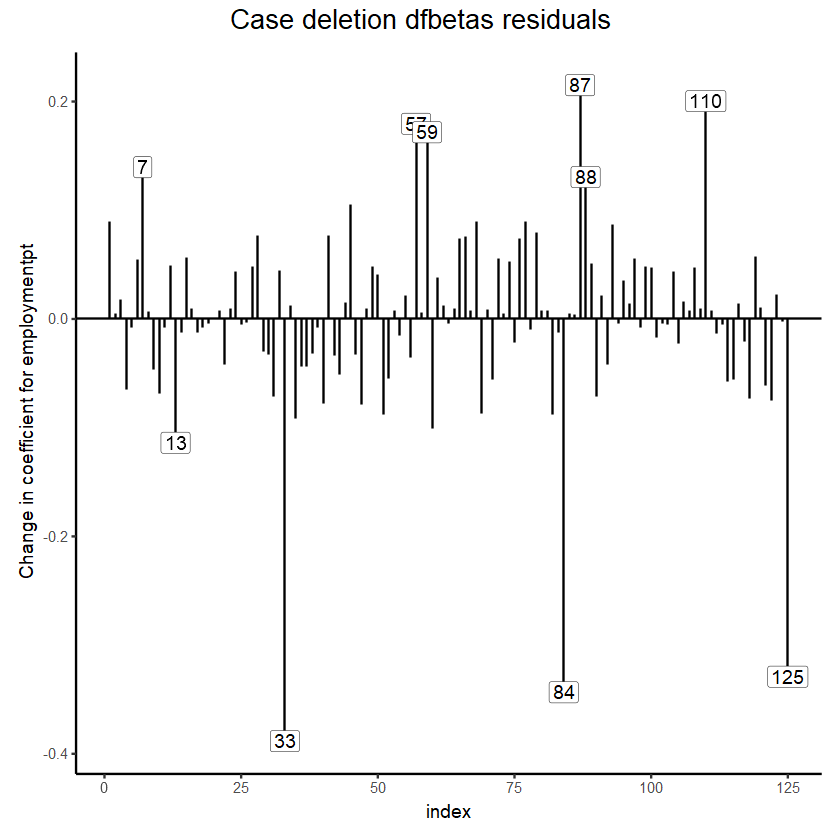

In [41]:
residualPlot(final, type = "dfbetas", vars = "employmentpt", topn = 10)

# 
#### 편차잔차 ($d_i$) : 마팅게일잔차가 비대칭이라는 단점을 극복하기 위하여 사용
- **모형의 적합도를 판단**
- **0을 중심으로 대칭구조 ($-\infty < d_i < \infty$), 합은 0이 아님**
- GLM의 편차와 유사한 개념
- 편차잔차의 절대값이 큰 경우, 이상치로 판단 가능

#### $d_i = sign(m_i)\times\sqrt{-2 \times (m_i + \delta_i log(\delta_i - m_i))}$
(sign함수)

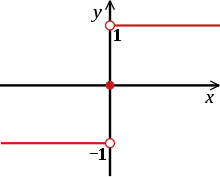

# 
# 
### 5-3 적합도검정 (Goodness of fit, GOF)
- **설명변수의 비례위험 가정에 대한 검정통계량과 p-value를 제공 -> 잔차산점도보다 더 객관적**
- 적합도 검정은 특정 반응변수에 대한 Schoenfelt 잔차가 생존시간에 관계없이 일정한지를 검정
    - **Scheonfeld잔차 : 대상환자 각각에 대하여 이벤트 발생 시, 관찰된 예측변수 값에서 예측변수의 가중평균을 빼서 계산**
    
# 

#### ```cox.zph()```
- ```transform``` : 생존시간의 변환에 대한 옵션 ("rank" : 시간순  "identity" : 시간변수 변환X / "km" : default)

# 

#### 귀무가설 : 반응변수와 설명변수의 비례위험 가정이 성립

- 예측변수 ```rx```와 ```logWBC```에 대한 p-value는 유의하지 않으나, ```sex```에 대한 p-value는 유의한 것으로 판단
    - **```sex```는 반응변수와의 비례위험 가정 성립X -> 시간이 경과함에 따라 ```sex```의 위험이 감소**

In [42]:
fit = coxph(Surv(time, status) ~ rx + sex + logWBC, anderson)
(x = cox.zph(fit))

       chisq df    p
rx     0.036  1 0.85
sex    5.420  1 0.02
logWBC 0.142  1 0.71
GLOBAL 5.879  3 0.12

#### ```coxzphplot()```

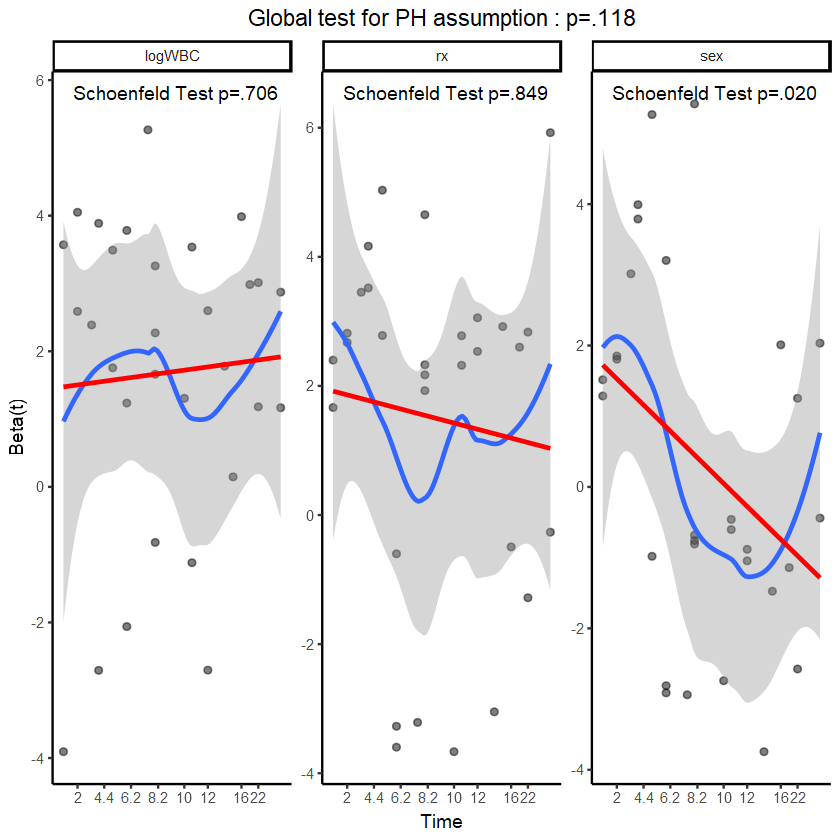

In [44]:
coxzphplot(x, add.lm = T)
# coxzphplot(x, var = "sex", add.lm = T)

# 
#### 생존시간의 변환 

In [48]:
data(pancreatic2, package = "asaur")
fit = coxph(Surv(pfs) ~ stage, pancreatic2)
gaze(fit) %>% myft()

a flextable object.
col_keys: ` `, `coef`, `se(coef)`, `z`, `Pr(>|z|)`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 1 row(s) 
original dataset sample: 
———————————————————————————————————————————————————————————————
           coef  se(coef)      z  Pr(>|z|)     HR  lower  upper 
———————————————————————————————————————————————————————————————
stageM    0.593     0.401  1.480      .139  1.810  0.825  3.969 
———————————————————————————————————————————————————————————————
n=41, events=41, Likelihood ratio test=2.43 on 1 df (p=.119) 

- 설명변수 ```stage```에 대한 p-value < 0.05 & 비례위험 가정에 대한 적합도 검정결과 p-value < 0.05 => 이 모형은 비례위험 가정을 만족X

       chisq df     p
stage   4.52  1 0.034
GLOBAL  4.52  1 0.034

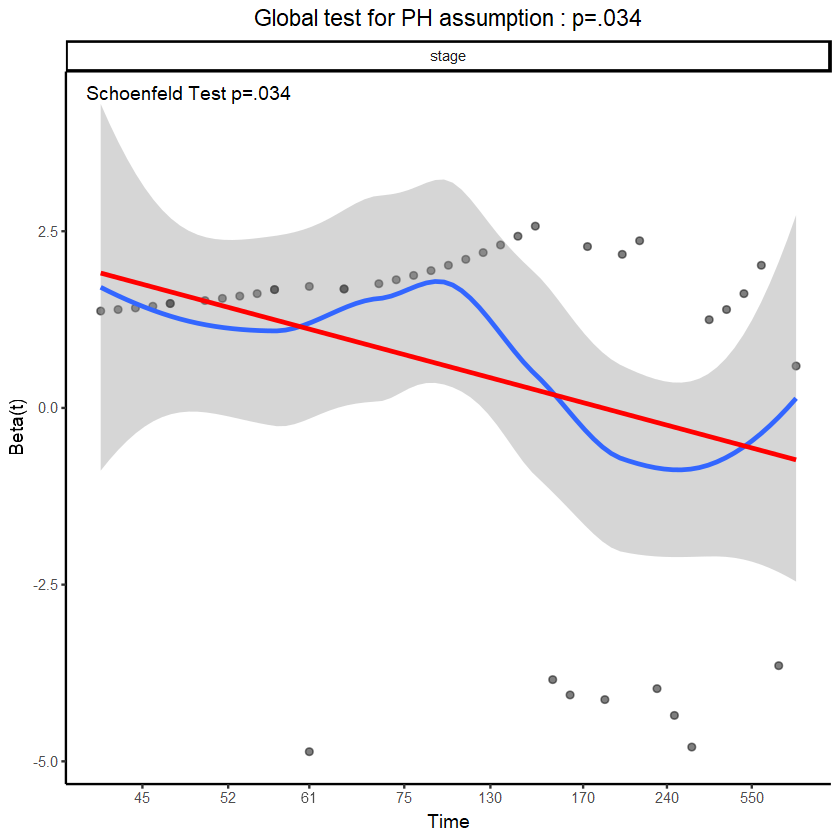

In [56]:
x = cox.zph(fit)
x
coxzphplot(x, add.lm = T)

- "rank"로 변환한 경우, 기본값인 "km"을 사용한 것과 비슷한 p-value

       chisq df     p
stage   4.57  1 0.033
GLOBAL  4.57  1 0.033

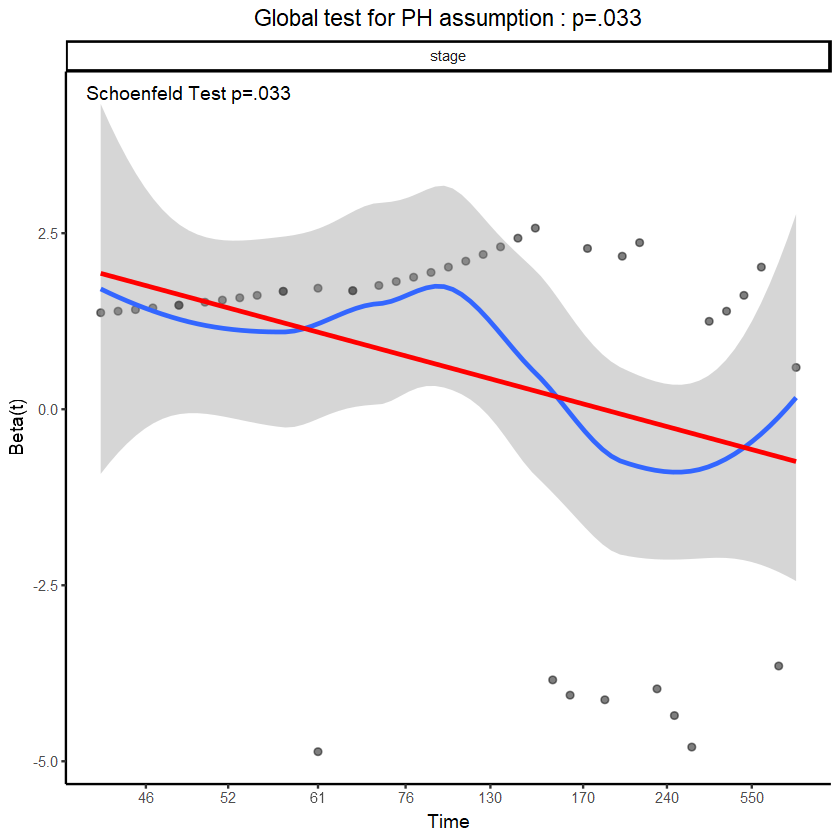

In [55]:
cox.zph(fit, transform = "rank")
coxzphplot(cox.zph(fit, transform = "rank"), add.lm = T)

- "identity"로 변환한 경우 큰 p-value
    - **데이터에서 이벤트의 발생이 긴 시간에 거쳐 상당히 드물게 발생하고, 긴 시간에 걸쳐 발생하는 잔차가 회귀선에 영향을 끼침**
    - **이벤트 발생이 시간에 따라 균등하게 분포되어 있지 않은 경우, 변환X**

       chisq df    p
stage   2.32  1 0.13
GLOBAL  2.32  1 0.13

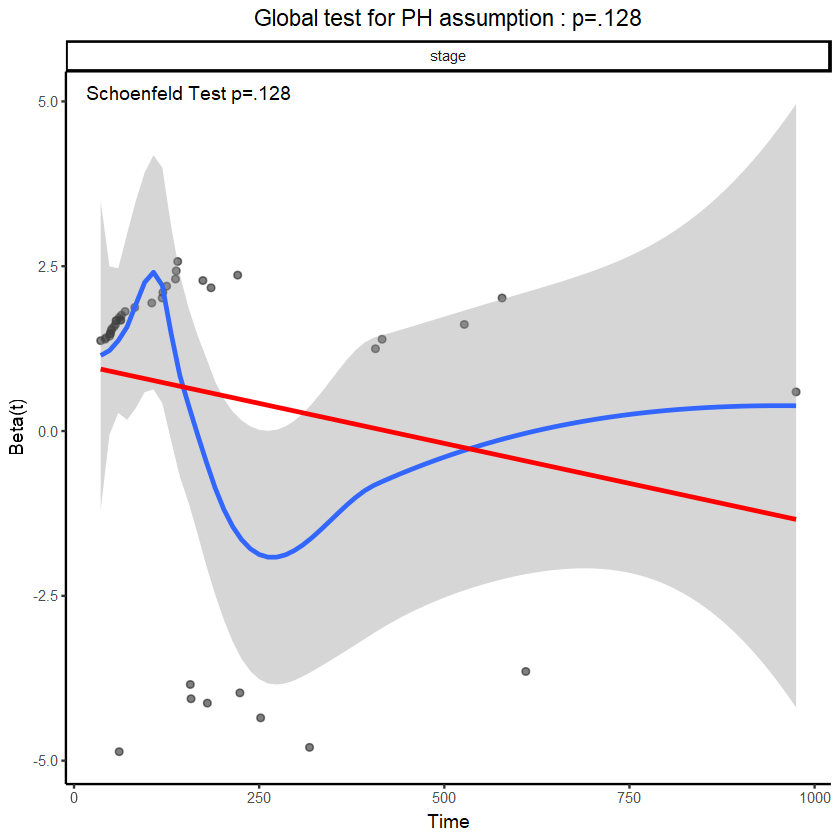

In [54]:
cox.zph(fit, transform = "identity")
coxzphplot(cox.zph(fit, transform = "identity"), add.lm = T)

# 
# 
#### Scheonfelt 잔차 상세
- Scheonfelt 잔차는 대상환자 각각에 대하여, 이벤트 발생 시 공변량 값에서 해당 기대값을 뺀 값으로 얻음
- 기대값은 위험집합에서 공변량들을 이용하여 계산
#### $\hat{r} = z_i - \bar{z}(t_i) = z_i - \sum_{k \in R_i} z_k \times p(\hat{\beta}, z_k)$

# 
#### 계산 풀이

In [59]:
(tbl = tibble(time = c(6, 7, 10, 15, 19, 25),
             status = c(1, 0, 1, 1, 0, 1),
             trt = c(0, 0, 1, 0, 1, 1)))

time,status,trt
<dbl>,<dbl>,<dbl>
6,1,0
7,0,0
10,1,1
15,1,0
19,0,1
25,1,1


In [58]:
fit = coxph(Surv(time, status) ~ trt, tbl)
gaze(fit) %>% myft()

a flextable object.
col_keys: ` `, `coef`, `se(coef)`, `z`, `Pr(>|z|)`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 1 row(s) 
original dataset sample: 
——————————————————————————————————————————————————————————————
         coef  se(coef)       z  Pr(>|z|)     HR  lower  upper 
——————————————————————————————————————————————————————————————
trt    -1.326     1.251  -1.060      .289  0.266  0.023  3.082 
——————————————————————————————————————————————————————————————
n=6, events=4, Likelihood ratio test=1.21 on 1 df (p=.271) 

# 
- 추정된 회귀계수 : -1.326
- **데이터를 이벤트가 발생한 시간에 따라 다음과 같이 정렬**

# 
#### 6주차 치료군에서 이벤트 발생
#### 위험대상(number at risk)는 치료군이 3명($n_{0i} = 3$), 대조군이 3명($n_{1i} = 3$)
#### 치료군의 가중치 : ${{e^{-1.326\times 0}}\over{3\;\times\;e^{-1.326\times0}\;+\;3\times e^{-1.326\times1}}} = {{1}\over{3\;\times\;1+3\times e^{-1.326}}}$
#### 대조군의 가중치 : ${{e^{-1.326\times 1}}\over{3\;\times\;e^{-1.326\times0}\;+\;3\times e^{-1.326\times1}}} = {{e^{-1.326}}\over{3\;\times\;1+3\times e^{-1.326}}}$

# 

| $t_i$ | $n_{0i}$ | $n_{1i}$ | $p(\beta, z_k = 0)$ | $p(\beta, z_k = 1)$ | 
| - | - | - | - | - |
| $6$ | $3$ | $3$ | ${1 \over {3+3\times e^{-1.326}}}$ | ${{e^-1.326} \over {3+3\times e^{-1.326}}}$ |
| $10$ | $1$ | $3$ | ${1 \over {1+3\times e^{-1.326}}}$ | ${{e^-1.326} \over {1+3\times e^{-1.326}}}$ |
| $15$ | $1$ | $2$ | ${1 \over {1+2\times e^{-1.326}}}$ | ${{e^-1.326} \over {1+2\times e^{-1.326}}}$ |
| $25$ | $0$ | $1$ | ${1 \over {e^{-1.326}}}$ | ${{e^-1.326} \over {e^{-1.326}}}$ |

# 
| $t_i$ | $E(Z_i) = \sum_{k \in R_j} \times p_k(\hat{\beta})$ | $z_i$ | $\hat{r_i} = z_i - E(Z_i)$ |
| - | - | - | - | 
|$6$ | $3\times0\times{{1}\over{3+3\times e^{-1.326}}}+3\times1\times {{e^-1.326} \over {3+3\times e^{-1.326}}}$ | $0$ | $-0.2098$ |
|$6$ | $3\times0\times{{1}\over{1+3\times e^{-1.326}}}+3\times1\times {{e^-1.326} \over {1+3\times e^{-1.326}}}$ | $1$ | $0.5566$ |
|$6$ | $1\times0\times{{1}\over{1+2\times e^{-1.326}}}+2\times1\times {{e^-1.326} \over {1+2\times e^{-1.326}}}$ | $0$ | $-0.3468$ |
|$6$ | $1$ | $1$ | $0$ |

#### ```residuals(... , type = "schoenfeld")```

In [60]:
residuals(fit, type = "schoenfeld")

6         10         15         25 
-0.2098004  0.5566351 -0.3468347  0.0000000

# 
#### 척도잔차 (scaled residual)
#### $r_i^* \approx r_i \times d \times var(\hat{\beta})$
- $d$ : 전체 이벤트 수
- $var(\hat{\beta})$ : 회귀계수의 분산

In [61]:
(resid.scaled = residuals(fit, type = "schoenfeld") * sum(tbl$status) * as.numeric(fit$var))

6        10        15        25 
-1.313064  3.483776 -2.170712  0.000000

# 
#### 위험비가 시간 $t$의 함수일 때, 척도찬자의 기대값
#### $E(r^* _i) \approx \beta + \beta(t)$
#### ```residuals(, ... type = "scaledsch)```

In [63]:
residuals(fit, type = "scaledsch")
# resid.scaled + fit$coefficients

6        10        15        25 
-2.639193  2.157647 -3.496841 -1.326129

In [64]:
cox.zph(fit)$y

,trt
6,-2.639193
10,2.157647
15,-3.496841
25,-1.326129
